In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

%matplotlib inline

# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

### Step by step function implementation
** def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):  Pre-Test **

In [6]:
## arguments
img = image
orient='x'
thresh_min=0
thresh_max=255

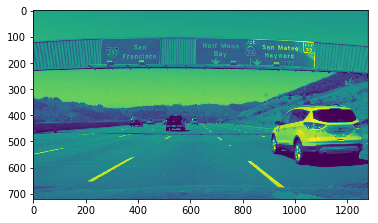

In [8]:
# 1) Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [10]:
# 2) Take the derivative in x or y given orient = 'x' or 'y'
if orient == 'x' :
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
else :
    sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

In [11]:
sobel.shape

(720, 1280)

In [12]:
# 3) Take the absolute value of the derivative or gradient
abs_sobel = np.absolute(sobel)

In [15]:
# 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel) )

In [18]:
np.max(scaled_sobel)

255

In [21]:
# 5) Create a mask of 1's where the scaled gradient magnitude 
#             # is > thresh_min and < thresh_max
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel>thresh_min)&(scaled_sobel<thresh_max) ] = 1

In [23]:
sxbinary[400:410, 300:310]

array([[1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=uint8)

In [ ]:
 # 6) Return this mask as your binary_output image
    ## return sxbinary

## Final Function Implementation

In [24]:
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

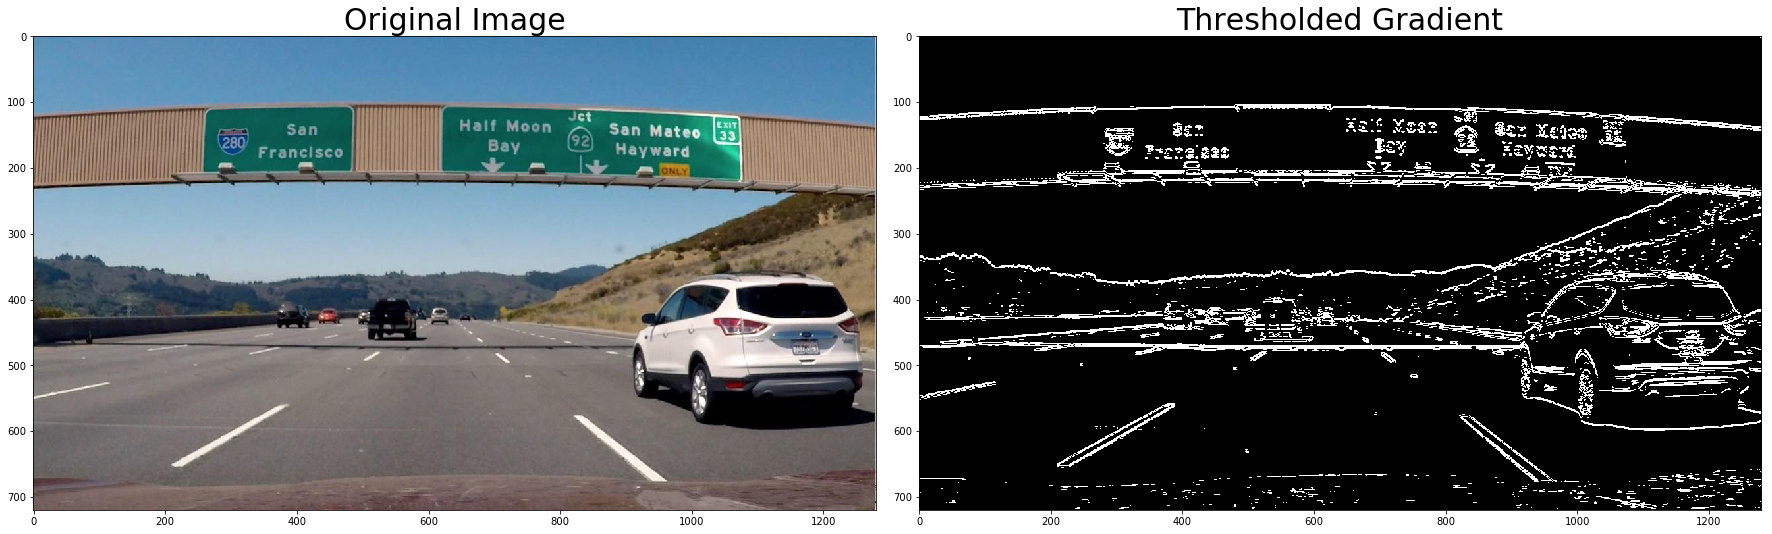

In [26]:
# Run the function , with orient orient='y'
grad_binary = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

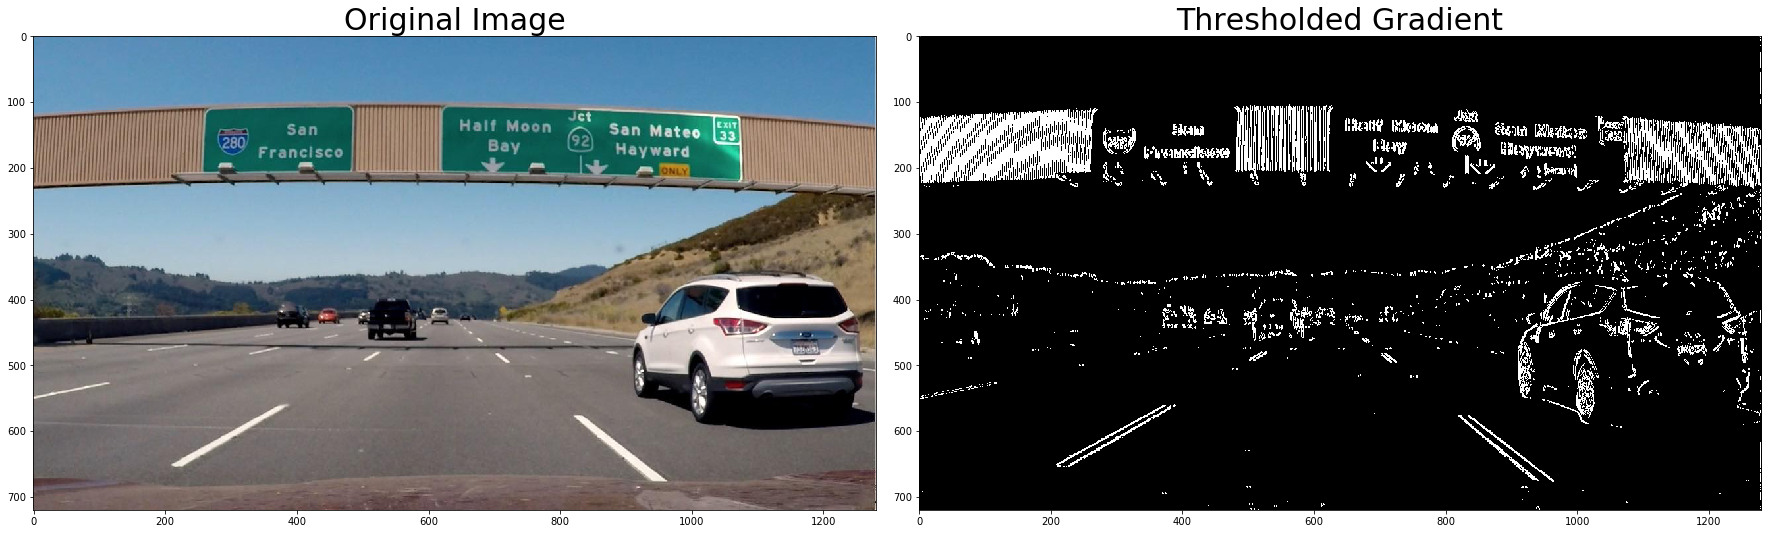

In [27]:
# Run the function with orient='x'
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)